<a href="https://colab.research.google.com/github/TruthTreeASD/ml/blob/apar/ASD_clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [0]:
# filename = 'Cleaned_StateData_2.csv'
filename = 'MunicipalData.csv'
data = pd.read_csv(filename)
print(data.shape)
data.head()

(394844, 594)


,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,12001003,NaN,1,2,1,PRATTVILLE CITY,1,...,0,0,0,0,0,0,20038,1790,0,18248
1,16,2016,NaN,12002002,NaN,1,2,2,DAPHNE CITY,1,...,0,0,0,0,0,0,20185,2675,0,17510
2,16,2016,NaN,12002004,NaN,1,2,2,FAIRHOPE CITY,1,...,0,0,0,0,0,0,50665,22865,5861,21939
3,16,2016,NaN,12002005,NaN,1,2,2,FOLEY CITY,1,...,0,0,0,0,0,0,81077,11748,19979,49350
4,16,2016,NaN,12002401,NaN,1,2,2,ORANGE BEACH CITY,1,...,0,0,0,0,0,0,32649,1275,0,31374


In [0]:
data[['Name', 'Year4']].drop_duplicates().groupby('Name').count()

,Year4
Name,
ABBEVILLE CITY,46
ABBEVILLE TOWN,14
ABBOTSFORD CITY,18
ABBOTT CITY,13
ABBOTTSTOWN BOROUGH,15
ABBYVILLE CITY,13
ABERCROMBIE CITY,11
ABERDEEN CITY,48
ABERDEEN TOWN,20


In [0]:
# data = data.rename(columns={'State':'Name'})
data = data.rename(columns={'Year4':'Year'})
data.head()

,SurveyYr,Year,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,12001003,NaN,1,2,1,PRATTVILLE CITY,1,...,0,0,0,0,0,0,20038,1790,0,18248
1,16,2016,NaN,12002002,NaN,1,2,2,DAPHNE CITY,1,...,0,0,0,0,0,0,20185,2675,0,17510
2,16,2016,NaN,12002004,NaN,1,2,2,FAIRHOPE CITY,1,...,0,0,0,0,0,0,50665,22865,5861,21939
3,16,2016,NaN,12002005,NaN,1,2,2,FOLEY CITY,1,...,0,0,0,0,0,0,81077,11748,19979,49350
4,16,2016,NaN,12002401,NaN,1,2,2,ORANGE BEACH CITY,1,...,0,0,0,0,0,0,32649,1275,0,31374


In [0]:
data = data[(data['Year']>=1977) & (data['Year']<=2016)]

In [0]:
keys = data.keys().tolist()
keys

['SurveyYr',
 'Year',
 'YearofData',
 'ID',
 'IDChanged',
 'State_Code',
 'Type_Code',
 'County',
 'Name',
 'FIPS_Code_State',
 'FIPS_County',
 'FIPS_Place',
 'FYEndDate',
 'YearPop',
 'SchLevCode',
 'Population',
 'FunctionCode',
 'Enrollment',
 'Total_Revenue',
 'Total_Rev_Own_Sources',
 'General_Revenue',
 'Gen_Rev_Own_Sources',
 'Total_Taxes',
 'Property_Tax',
 'Tot_Sales___Gr_Rec_Tax',
 'Total_Gen_Sales_Tax',
 'Total_Select_Sales_Tax',
 'Alcoholic_Beverage_Tax',
 'Amusement_Tax',
 'Insurance_Premium_Tax',
 'Motor_Fuels_Tax',
 'Pari_mutuels_Tax',
 'Public_Utility_Tax',
 'Tobacco_Tax',
 'Other_Select_Sales_Tax',
 'Total_License_Taxes',
 'Alcoholic_Beverage_Lic',
 'Amusement_License',
 'Corporation_License',
 'Hunting___Fishing_License',
 'Motor_Vehicle_License',
 'Motor_Veh_Oper_License',
 'Motor_Vehicle_License_Total',
 'Public_Utility_License',
 'Occup_and_Bus_Lic_NEC',
 'Other_License_Taxes',
 'Total_Income_Taxes',
 'Individual_Income_Tax',
 'Corp_Net_Income_Tax',
 'Death_and_Gif

In [0]:
def getNearest(df, num):  
  nbrs = NearestNeighbors(n_neighbors=num, algorithm='auto').fit(df)
  distances, indices = nbrs.kneighbors(df)
  
  return distances, indices

In [0]:
def getNearest2(df1, df2, num):  
  nbrs = NearestNeighbors(n_neighbors=num, algorithm='auto').fit(df1)
  distances, indices = nbrs.kneighbors(df2)
  
  return distances, indices

In [0]:
# def getSimilarStates_multi(state, attributes, year, num=1):
#   df = data[data['Year']==year][['Name'] + attributes]
#   df = df.set_index('Name')
#   _, indices = getNearest(df, num+1)
#   id_ = df.index.tolist().index(state)
  
#   neighbors = indices[id_]
#   return df.index[neighbors].tolist()

In [0]:
# def getSimilarStates(state, attribute, num=1):
#   df = data[['Year', 'Name'] + [attribute]]
#   pivoted = df.pivot_table(index='Name', columns='Year', values=attribute)
#   pivoted = pivoted.sort_index()
#   distances, indices = getNearest(pivoted, num+1)
#   id_ = pivoted.index.tolist().index(state)
  
#   neighbors = indices[id_]
#   distances = distances[id_]

#   return pivoted.index[neighbors].tolist(), distances

In [0]:
state = 'ALABAMA'
attribute = 'Total_Expenditure'
norm_by = 'Total_Revenue'
yearRange = [2000, 2016]
num=2

In [0]:
#

In [0]:
df = df[['Year', 'Name', attribute, norm_by]]
df.head(10)

,Year,Name,Total_Expenditure,Total_Revenue
0,2016,PRATTVILLE CITY,32045,46957
1,2016,DAPHNE CITY,32072,32917
2,2016,FAIRHOPE CITY,64756,67954
3,2016,FOLEY CITY,183260,171445
4,2016,ORANGE BEACH CITY,34821,41415
5,2016,EUFAULA CITY,19302,22991
6,2016,ANNISTON CITY,57047,46875
7,2016,JACKSONVILLE CITY,15512,13289
8,2016,OXFORD CITY,59844,48667
9,2016,CUSSETA TOWN,492,563


In [0]:
df = data
df1 = df[['Year', 'Name'] + [attribute]]
df2 = df[['Year', 'Name'] + [norm_by]]

pivoted1 = df1.pivot_table(index='Name', columns='Year', values=attribute)
pivoted2 = df2.pivot_table(index='Name', columns='Year', values=norm_by)

pivoted = pivoted1/pivoted2

In [0]:
pivoted.head()

Year,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,,,,,,,,,,,,,,,,,,,,,
ABBEVILLE CITY,1.052022,0.943625,1.025590,0.961185,0.917341,1.008988,0.913199,0.950982,1.132167,1.071965,...,1.002755,0.970736,1.040804,1.058077,1.088715,1.078180,1.01977,0.996101,0.943367,0.934351
ABBEVILLE TOWN,NaN,NaN,0.466667,0.921053,0.897436,0.603774,0.846154,0.885714,1.088235,1.054054,...,1.127273,NaN,NaN,NaN,NaN,0.951807,NaN,NaN,NaN,NaN
ABBOTSFORD CITY,1.062500,NaN,1.127932,NaN,0.821468,1.402706,NaN,0.958796,0.611978,0.971320,...,1.088431,NaN,NaN,NaN,NaN,0.997992,NaN,NaN,NaN,NaN
ABBOTT CITY,0.804348,NaN,1.130435,NaN,NaN,0.951613,NaN,0.679245,0.676056,0.891892,...,1.000000,NaN,NaN,NaN,NaN,0.790528,NaN,NaN,NaN,NaN
ABBOTTSTOWN BOROUGH,0.750000,NaN,0.478261,NaN,0.633333,0.531646,NaN,1.635802,0.852632,0.830189,...,1.412322,NaN,NaN,NaN,NaN,1.019231,NaN,NaN,NaN,NaN


40

686320

In [0]:
data['Name'].nunique() * data['Year'].nunique(), data[['Year', 'Name']].drop_duplicates().shape[0]

(826512, 322580)

In [0]:
pd.pivot_table(data, index='Name', columns='Year', aggfunc='count')

In [0]:

distances, indices = getNearest(pivoted, num+1)
id_ = pivoted.index.tolist().index(state)
neighbors = indices[id_]
distances = distances[id_]


In [0]:
##

0

In [0]:
def getSimilarStates(df, state, attribute, year_range, norm_by, num=1):
  df1 = df[['Year', 'Name'] + [attribute]]  
  df2 = df[['Year', 'Name'] + [norm_by]]

  pivoted1 = df1.pivot_table(index='Name', columns='Year', values=attribute)
  pivoted2 = df2.pivot_table(index='Name', columns='Year', values=norm_by)

  pivoted1 = pivoted1.sort_index()
  pivoted2 = pivoted2.sort_index()
    
  pivoted = pivoted1/pivoted2

  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
getSimilarStates(data, state, attribute, yearRange, norm_by)

ValueError: ignored

In [0]:
%%timeit
getSimilarStates(data, state, attribute, yearRange, norm_by)

100 loops, best of 3: 16.6 ms per loop


In [0]:
def getSimilarStates(df, state, attribute, year_range, norm_by, num=1):
  df1 = df[['Year', 'Name'] + [attribute]]
  df2 = df[['Year', 'Name'] + [norm_by]]

  pivoted1 = df1.pivot_table(index='Name', columns='Year', values=attribute)
  pivoted2 = df2.pivot_table(index='Name', columns='Year', values=norm_by)

  pivoted = pivoted1/pivoted2

  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
%%timeit
getSimilarStates(data, state, attribute, yearRange, norm_by)

100 loops, best of 3: 16.5 ms per loop


In [0]:
def getSimilarStates(df, state, attribute, year_range, norm_by, num=1):
  pivoted1 = df.pivot_table(index='Name', columns='Year', values=attribute)
  pivoted2 = df.pivot_table(index='Name', columns='Year', values=norm_by)

  pivoted = pivoted1/pivoted2

  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
%%timeit
getSimilarStates(data, state, attribute, yearRange, norm_by)

100 loops, best of 3: 16.4 ms per loop


In [0]:
def getSimilarStates(df, state, attribute, year_range, norm_by, num=1):
  pivoted = df.pivot_table(index='Name', columns='Year', values=[attribute, norm_by])

  pivoted = pivoted[attribute]/pivoted[norm_by]

  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
%%timeit
getSimilarStates(data, state, attribute, yearRange, norm_by)

100 loops, best of 3: 9.8 ms per loop


In [0]:
def getSimilarStates(df, place, attribute, year_range, norm_by, num=1):
  pivoted = df.pivot_table(index='Name', columns='Year', values=[attribute, norm_by])

  pivoted = pivoted[attribute]/pivoted[norm_by]

  distances, indices = getNearest2(pivoted, pivoted.loc[place][np.newaxis, :], num+1)

  return pivoted.index[indices].tolist(), distances  

In [0]:
%%timeit
getSimilarStates(data, state, attribute, yearRange, norm_by)

100 loops, best of 3: 9.93 ms per loop


In [0]:
def getSimilarStates2(df, state, attribute, year_range, norm_by, num=1):
  pivoted = pd.pivot_table(df, index='Name', columns='Year', values=[attribute, norm_by])
  temp = pivoted[attribute]/pivoted[norm_by]
  distances, indices = getNearest(temp, num+1)
  id_ = temp.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

100 loops, best of 3: 16.2 ms per loop


In [0]:
%%timeit
getSimilarStates2(data, state, attribute, yearRange, norm_by)

100 loops, best of 3: 9.64 ms per loop


In [0]:
def getSimilarStates_norm(state, attribute, norm_by, num=1):
  df = data[['Year', 'Name'] + [attribute]]
  df_norm = data[['Year', 'Name'] + [norm_by]]

  pivoted = df.pivot_table(index='State', columns='Year', values=attribute)
  pivoted_norm = df_norm.pivot_table(index='State', columns='Year', values=norm_by)

  pivoted = pivoted.sort_index()
  pivoted_norm = pivoted_norm.sort_index()
    
  pivoted = pivoted/pivoted_norm

  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
def getSimilarStates_norm_yearRange(state, attribute, norm_by, years, num=1):
  df = data[(years[0] <= data['Year']) & (data['Year'] <= years[1])]
  df = data[['Year', 'State'] + [attribute, norm_by]]

  pivoted = df.pivot_table(index='State', columns='Year', values=attribute)
  pivoted_norm = df.pivot_table(index='State', columns='Year', values=norm_by)

  pivoted = pivoted.sort_index()
  pivoted_norm = pivoted_norm.sort_index()
    
  pivoted = pivoted/pivoted_norm

  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
# def plotting(states, attribute):
#   for state in states:
#     plt.plot(data['Year'].drop_duplicates(), data[data['State']==state][attribute])
# #   plt.title(states[0])
#   plt.legend(states)
#   plt.xlabel('Year')
#   plt.ylabel(attribute)
#   plt.show()

In [0]:
def plotting(states, attribute, norm_by=None):
  for state in states:
    if norm_by:
      df = data[data['State']==state][[attribute, norm_by]]
      df = df[attribute]/df[norm_by]
    else:
      df = data[data['State']==state][attribute]
    
    plt.plot(data['Year'].drop_duplicates(), df)
#   plt.title(states[0])
  plt.legend(states)
  plt.xlabel('Year')
  plt.ylabel(attribute)
  plt.show()

### Finding similarity based on time series for a multiple attributes

In [0]:
def getSimilarStates_multiAtt_multiYear(state, attributes, years=None, num=1):
  if years:
    df = data[(years[0] <= data['Year']) & (data['Year'] <= years[1])]
  else:
    df = data
    
  df = df[['Year', 'State'] + attributes]
  pivoted = pd.pivot_table(df, index='State', columns='Year')
  pivoted = pivoted.sort_index()
  distances, indices = getNearest(pivoted, num+1)
  id_ = pivoted.index.tolist().index(state)
  neighbors = indices[id_]
  distances = distances[id_]

  return pivoted.index[neighbors].tolist(), distances

In [0]:
state = 'SOUTH CAROLINA'
attributes = ['Total_Revenue', 'Total_Taxes', 'Total_Expenditure']
years = None#[2000, 2005]

In [0]:
similar, _ = getSimilarStates_multiAtt_multiYear(state, attributes, years=years, num=3) 
print(similar[0], '->', similar[1:])

TENNESSEE -> ['MISSOURI', 'KENTUCKY', 'SOUTH CAROLINA']


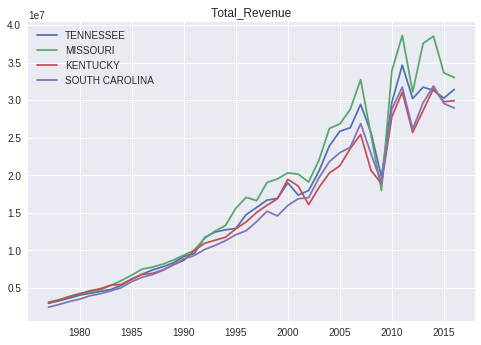

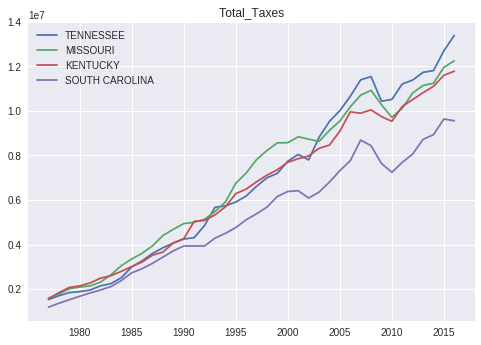

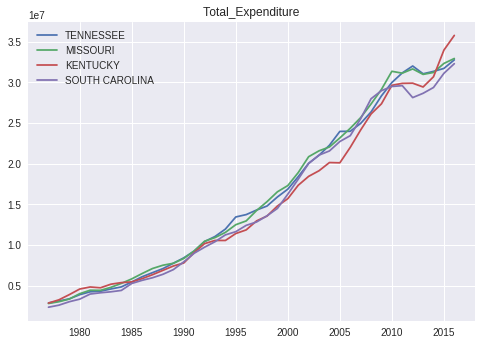

In [0]:
for attribute in attributes:
  for state in similar:
    df = data
    if years:
      df = df[(df['Year']>=years[0]) & (df['Year']<=years[1])]
    plt.plot(df[df['State']==state]['Year'], df[df['State']==state][attribute])
  plt.title(attribute)
  plt.legend(similar)
  plt.show()

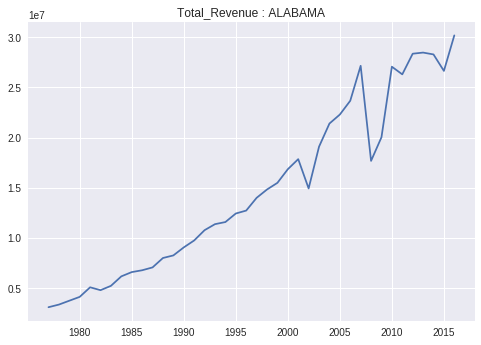

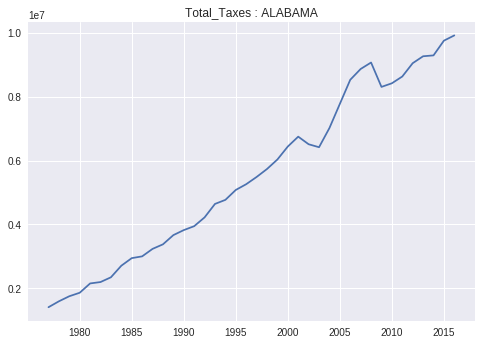

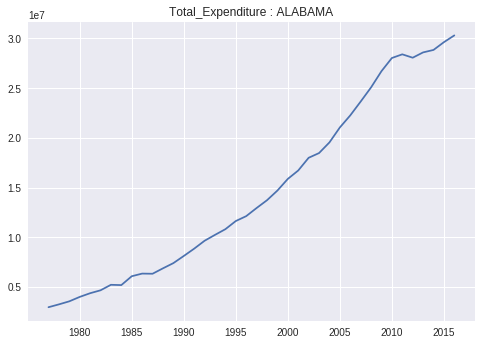

In [0]:
for attribute in attributes:
  plt.title(attribute + ' : ' + state)
  plt.plot(data[data['State']==state]['Year'], data[data['State']==state][attribute])
  plt.show()

### Finding similarity based on time series for a particular attribute

In [0]:
[state for state in data['State'].drop_duplicates() if 'wa' in state.lower()]

['DELAWARE', 'WASHINGTON DC CITY', 'HAWAII', 'IOWA', 'WASHINGTON']

In [0]:
# [key for key in keys if 'total_' in key.lower()]
[key for key in keys if key.startswith('Total_R')]

['Total_Revenue', 'Total_Rev_Own_Sources']

In [0]:
attribute = 'Total_Expenditure'
# attribute = 'Total_Taxes'

# norm_by = 'Population'
norm_by = 'Total_Revenue'

state = 'ALABAMA'
# state = 'WASHINGTON'

In [0]:
similar_states, dist = getSimilarStates(state, attribute, num=1)
print('States similar to', state, 'with respect to', attribute, 'are', similar_states[1:])

similar_states_norm, dist_norm = getSimilarStates_norm(state, attribute, norm_by, num=5)
print('States similar to', state, 'with respect to', attribute, 'normalized by', norm_by, 'are', similar_states_norm[1:])

States similar to ALABAMA with respect to Total_Expenditure are ['SOUTH CAROLINA']
States similar to ALABAMA with respect to Total_Expenditure normalized by Total_Revenue are ['MICHIGAN', 'MISSISSIPPI', 'SOUTH CAROLINA', 'MARYLAND', 'KENTUCKY']


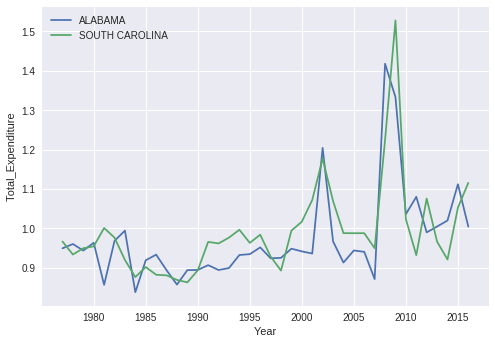

In [0]:
plotting(similar_states, attribute, norm_by)

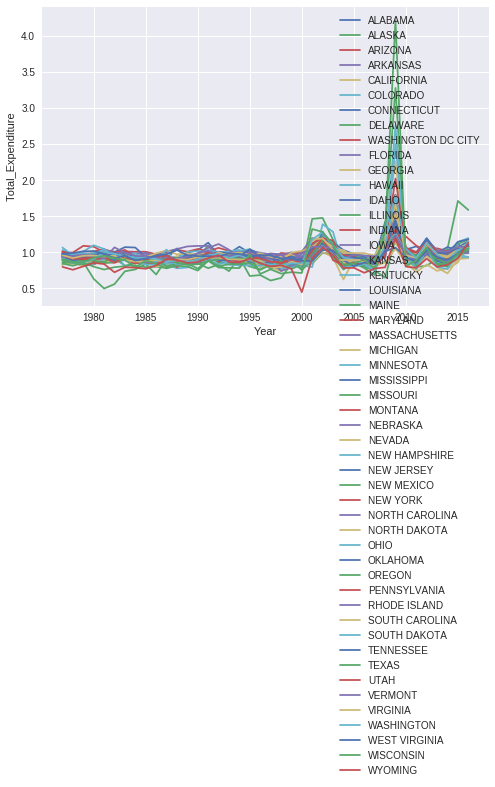

In [0]:
plotting(data['State'].drop_duplicates(), attribute, norm_by)

In [0]:
get(similar_states, attribute, norm, [2000, 2015])

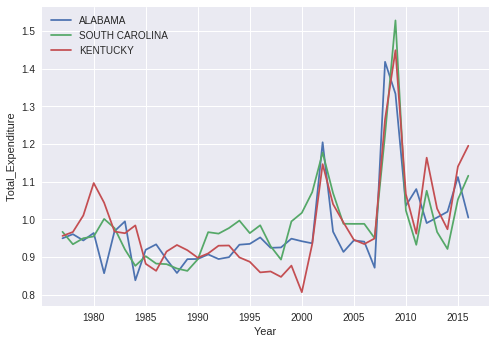

In [0]:
states = similar_states
for state in states:
  plt.plot(data['Year'].drop_duplicates(), data[data['State']==state][attribute]/data[data['State']==state][norm_by])
#   plt.title(states[0])
plt.legend(states)
plt.xlabel('Year')
plt.ylabel(attribute)
plt.show()
  
del states

### Finding similarity for single year

In [0]:
keyword = 'health'

# attributes_ = ['Total_Revenue']
attributes_ = [key for key in keys if keyword in key.lower()]
attributes_

['Fed_IGR_Health___Hos',
 'Local_IGR_Health___Hos',
 'Health_Total_Expend',
 'Health_Direct_Expend',
 'Health_Capital_Outlay',
 'Health_Current_Exp',
 'Health_Construction',
 'Health_IG_Local_Govts']

In [0]:
state = 'ARIZONA'
# state = 'COLORADO'
# state = 'HAWAII'
# state = 'WASHINGTON'
# state = 'ALABAMA'

print('In terms of', attributes_, ':')
for y in range(1977, 2017):
  similar_states = getSimilarStates_multi(state, attributes_, y, num=1)
  print(similar_states[0], 'was similar to', similar_states[1:], 'in the year', y)

In terms of ['Fed_IGR_Health___Hos', 'Local_IGR_Health___Hos', 'Health_Total_Expend', 'Health_Direct_Expend', 'Health_Capital_Outlay', 'Health_Current_Exp', 'Health_Construction', 'Health_IG_Local_Govts'] :
ARIZONA was similar to ['ARKANSAS'] in the year 1977
ARIZONA was similar to ['WASHINGTON DC CITY'] in the year 1978
ARIZONA was similar to ['WASHINGTON DC CITY'] in the year 1979
ARIZONA was similar to ['COLORADO'] in the year 1980
ARIZONA was similar to ['MINNESOTA'] in the year 1981
ARIZONA was similar to ['KENTUCKY'] in the year 1982
ARIZONA was similar to ['WEST VIRGINIA'] in the year 1983
ARIZONA was similar to ['WEST VIRGINIA'] in the year 1984
ARIZONA was similar to ['WEST VIRGINIA'] in the year 1985
ARIZONA was similar to ['OKLAHOMA'] in the year 1986
ARIZONA was similar to ['MINNESOTA'] in the year 1987
ARIZONA was similar to ['COLORADO'] in the year 1988
ARIZONA was similar to ['COLORADO'] in the year 1989
ARIZONA was similar to ['LOUISIANA'] in the year 1990
ARIZONA was s

In [0]:
data[(data['Year']==2016) & (data['State'].isin(similar_states))][attributes_]

,Alcoholic_Beverage_Tax,Alcoholic_Beverage_Lic
4,368699,57406
47,347642,143858


In [0]:
###

In [0]:
[key for key in keys if 'income' in key.lower()]

['Total_Income_Taxes', 'Individual_Income_Tax', 'Corp_Net_Income_Tax']

In [0]:
attribute = 'Total_Income_Taxes'

print('With respect to', attribute, ':')
for state in data['State'].sort_values().drop_duplicates():
  similar_states = getSimilarStates(state, attribute, 2)
  print(state, 'is most similar to', similar_states[1:])
#   plotting(similar_states, attribute)

With respect to Total_Income_Taxes :
ALABAMA is most similar to ['SOUTH CAROLINA', 'OKLAHOMA']
ALASKA is most similar to ['TEXAS', 'KANSAS']
ARIZONA is most similar to ['ALABAMA', 'SOUTH CAROLINA']
ARKANSAS is most similar to ['UTAH', 'KANSAS']
CALIFORNIA is most similar to ['NEW YORK', 'ILLINOIS']
COLORADO is most similar to ['MISSOURI', 'OREGON']
CONNECTICUT is most similar to ['OREGON', 'MARYLAND']
DELAWARE is most similar to ['IDAHO', 'RHODE ISLAND']
FLORIDA is most similar to ['LOUISIANA', 'OKLAHOMA']
GEORGIA is most similar to ['MINNESOTA', 'MARYLAND']
HAWAII is most similar to ['MAINE', 'MISSISSIPPI']
IDAHO is most similar to ['DELAWARE', 'RHODE ISLAND']
ILLINOIS is most similar to ['MASSACHUSETTS', 'NEW JERSEY']
INDIANA is most similar to ['MISSOURI', 'OREGON']
IOWA is most similar to ['ALABAMA', 'SOUTH CAROLINA']
KANSAS is most similar to ['ARKANSAS', 'ALABAMA']
KENTUCKY is most similar to ['ARIZONA', 'SOUTH CAROLINA']
LOUISIANA is most similar to ['OKLAHOMA', 'ALABAMA']
MAINE

In [0]:
state = 'ALABAMA'
attribute = 'Property_Tax'

In [0]:
def clean_data(attribute):
  df = data.pivot_table(index='State', columns='Year', values=attribute).sort_index()
  a = df.astype(bool).sum(axis=1)
  df = df.drop(index=a[a<10].index)
  df = df.replace(0, np.nan)
  df.iloc[:, 0] = df.iloc[:, 0].fillna(0)
  df = df.interpolate()
  df = df.fillna(0)
  return df

In [0]:
# state = 'ALABAMA'

attribute = 'Property_Tax'
# attribute = 'Total_Income_Taxes'
# attribute = 'Tot_Sales___Gr_Rec_Tax'

num = 1

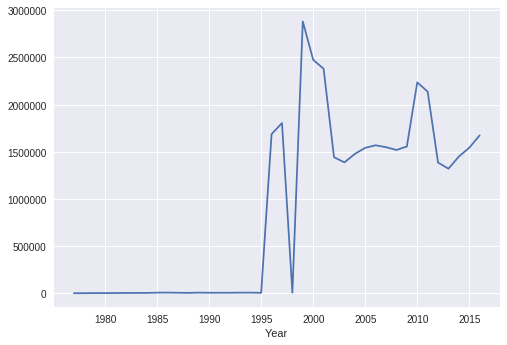

In [0]:
df.loc['COLORADO'].plot()

With respect to Property_Tax :


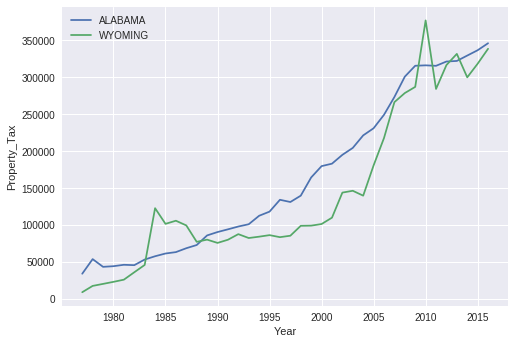

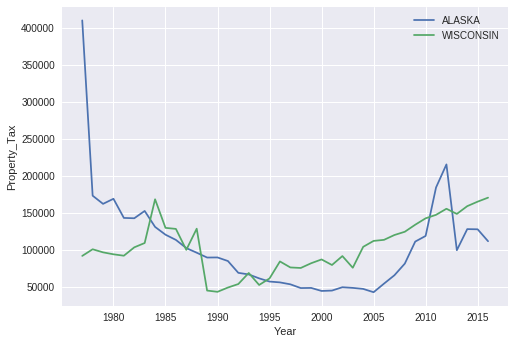

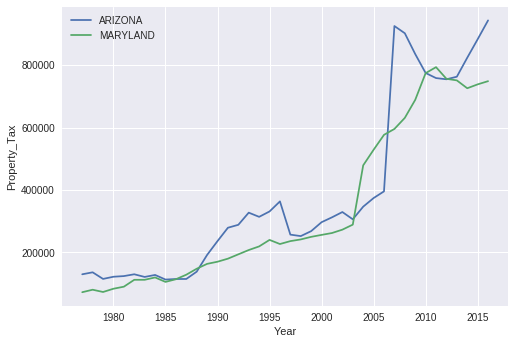

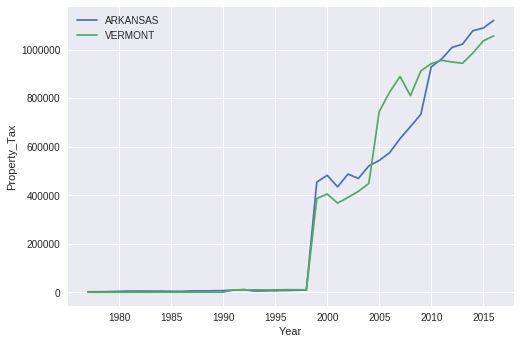

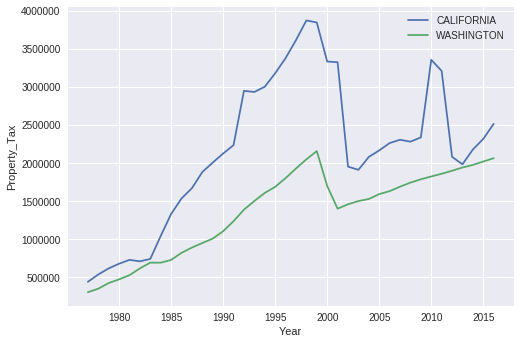

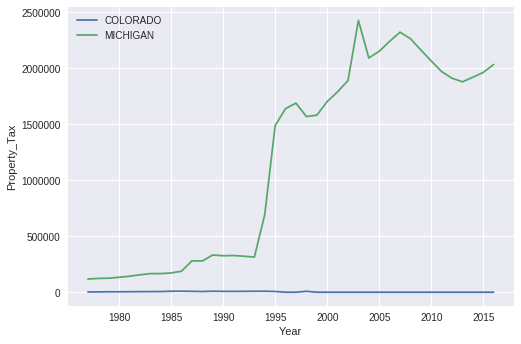

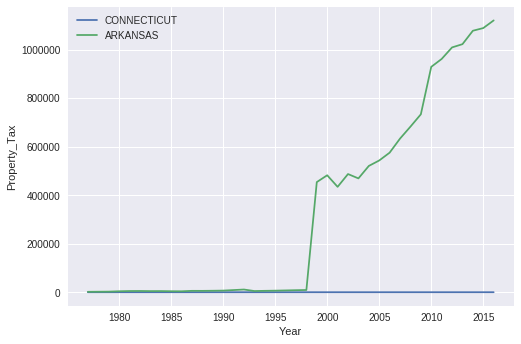

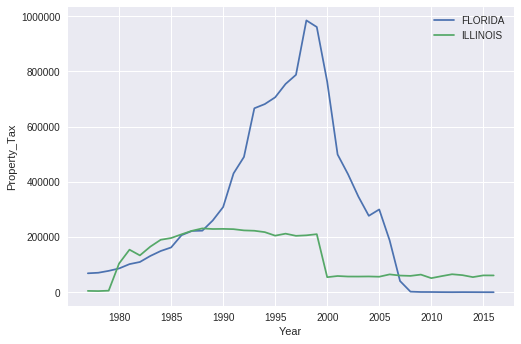

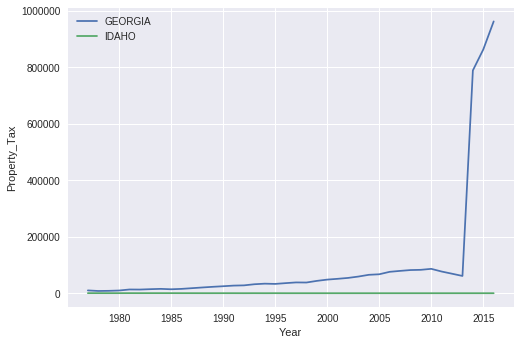

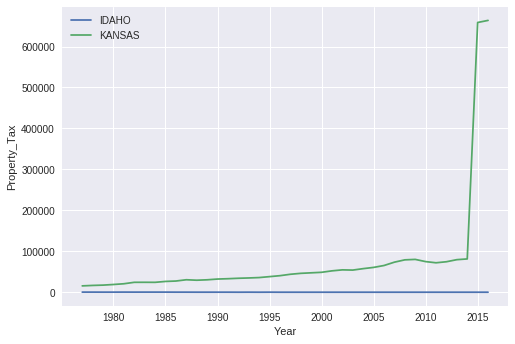

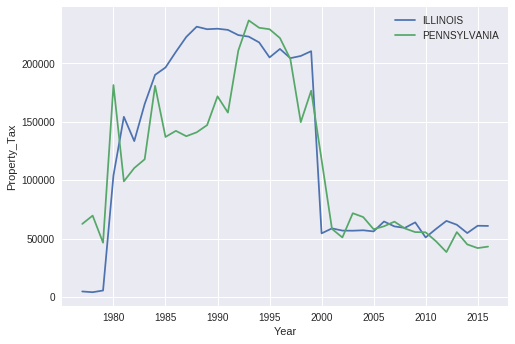

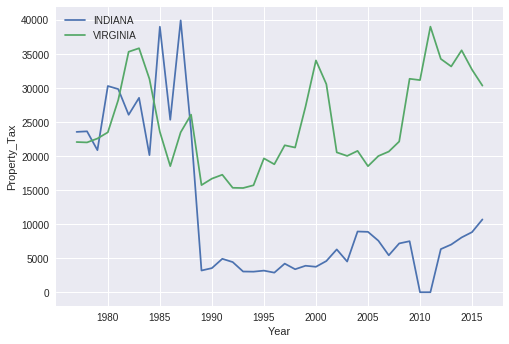

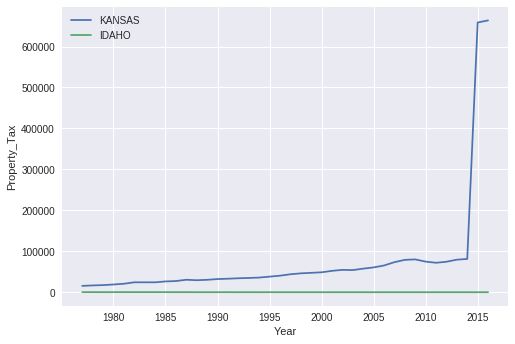

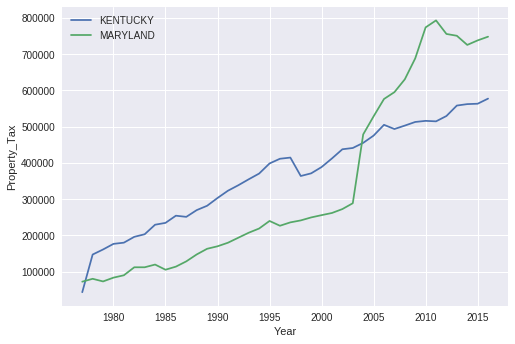

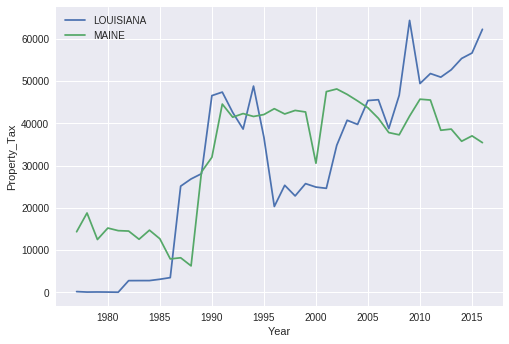

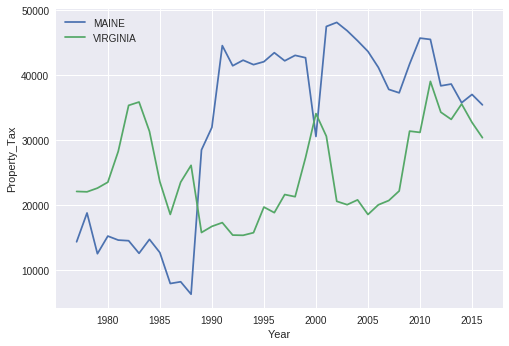

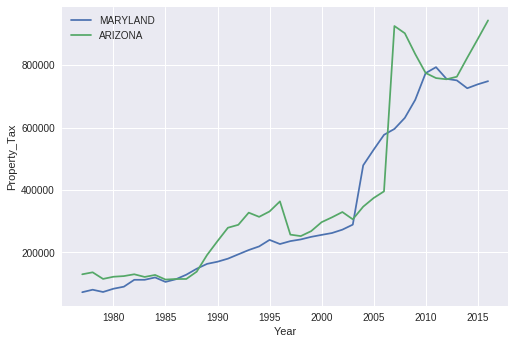

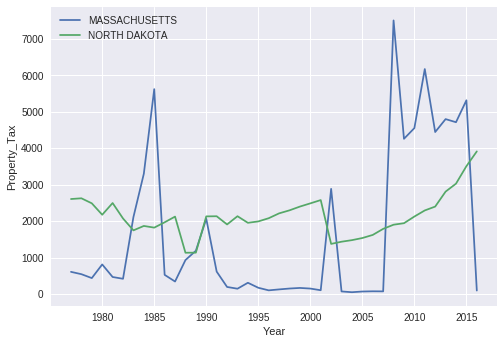

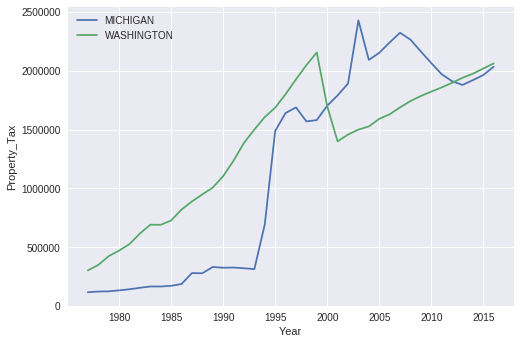

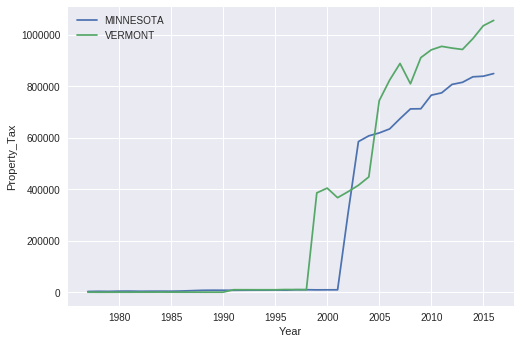

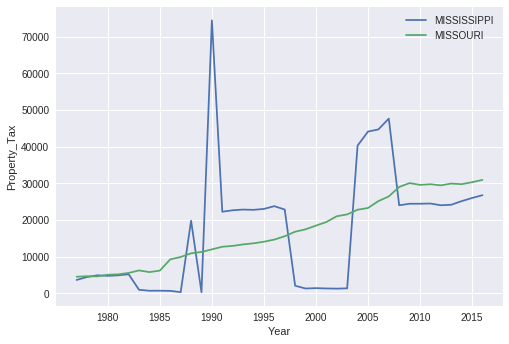

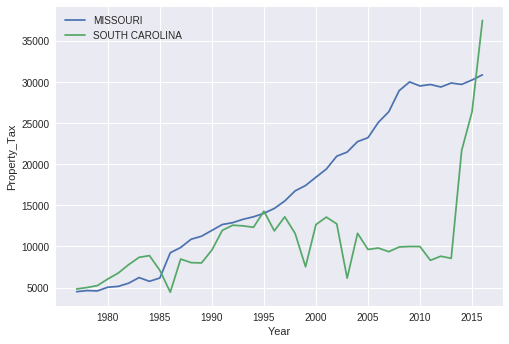

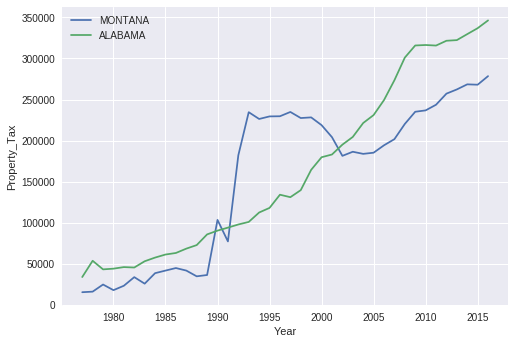

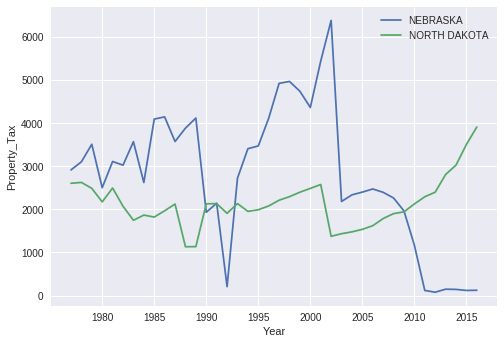

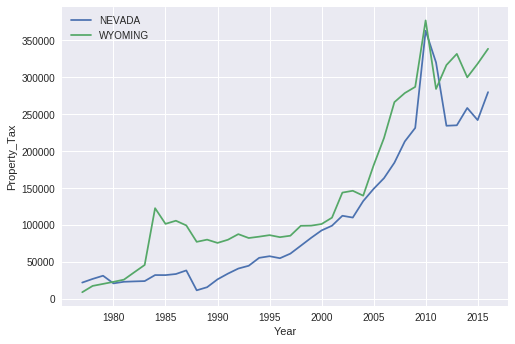

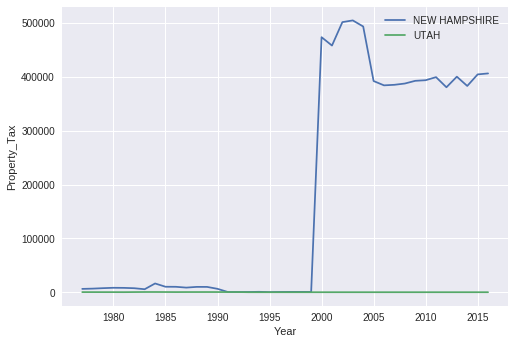

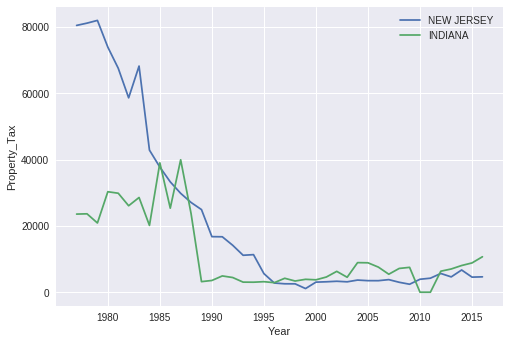

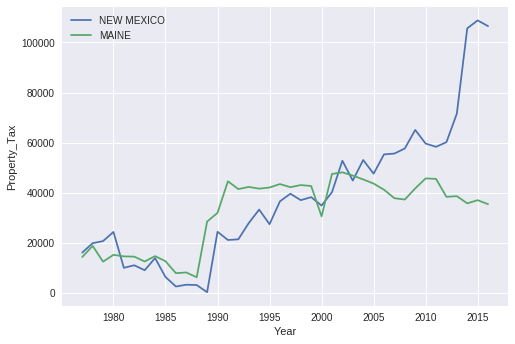

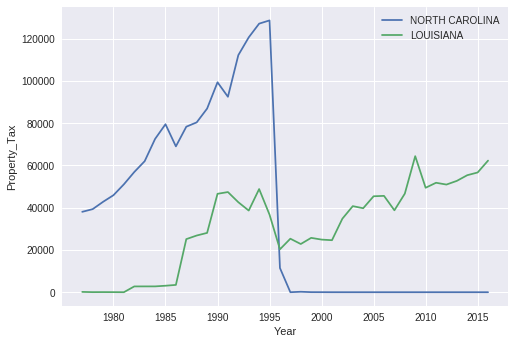

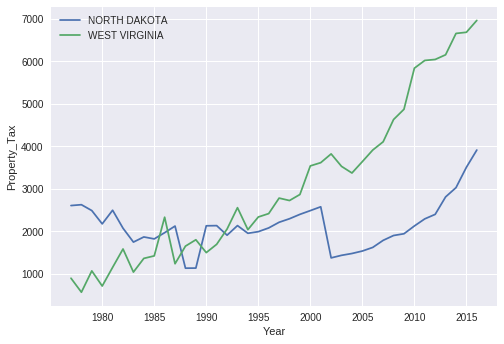

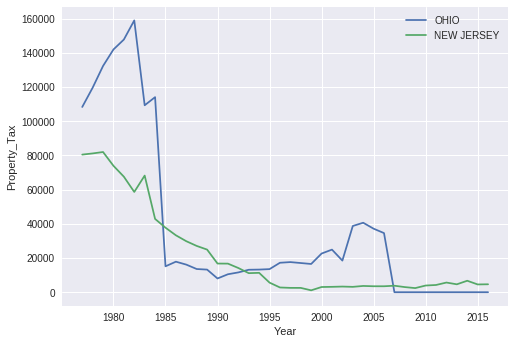

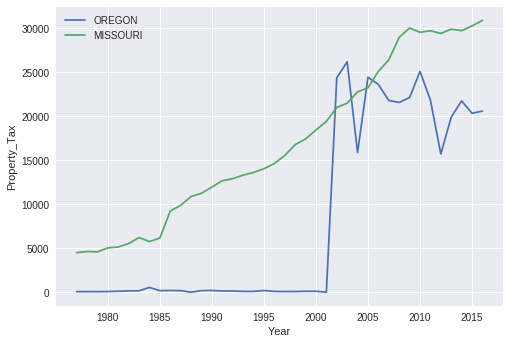

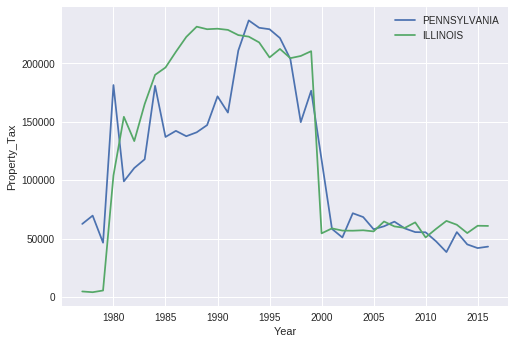

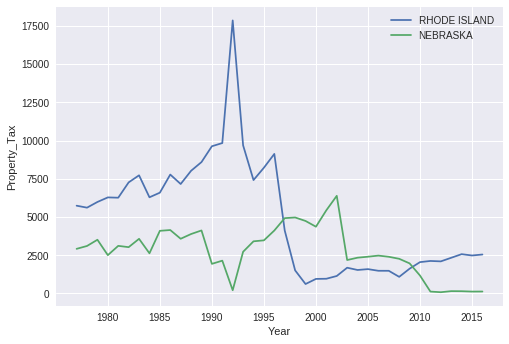

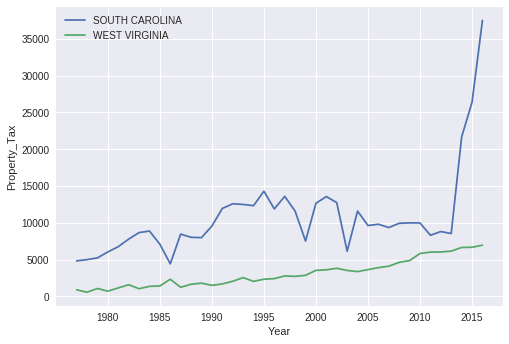

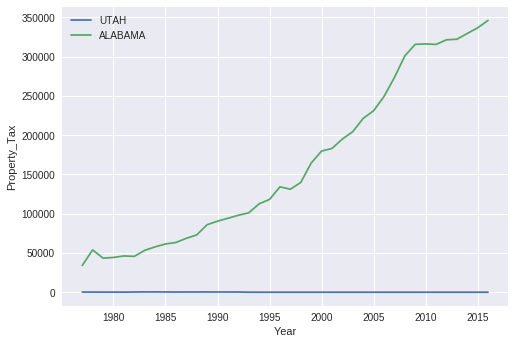

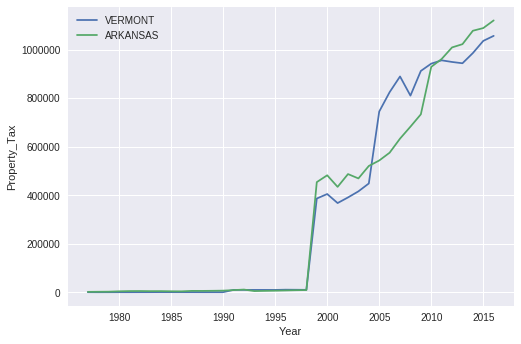

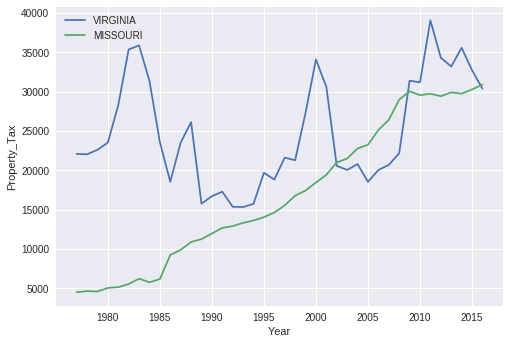

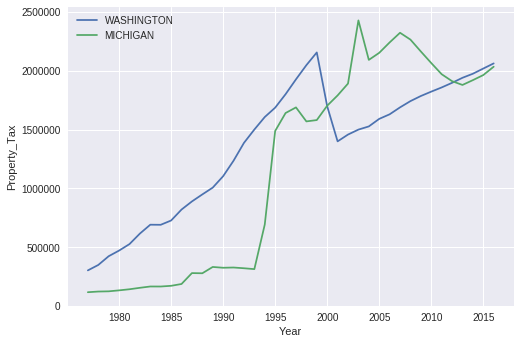

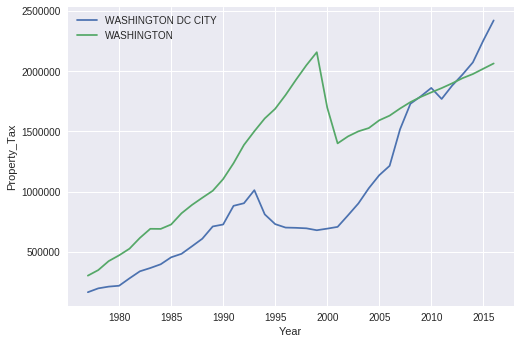

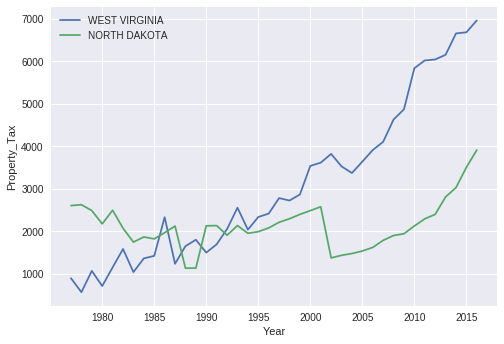

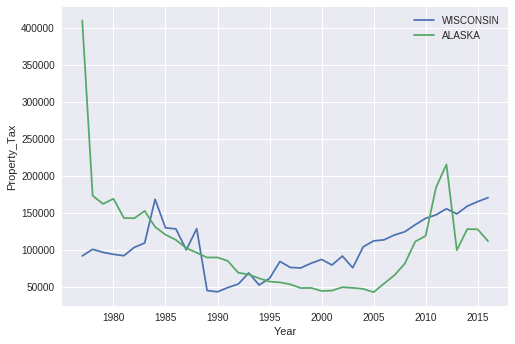

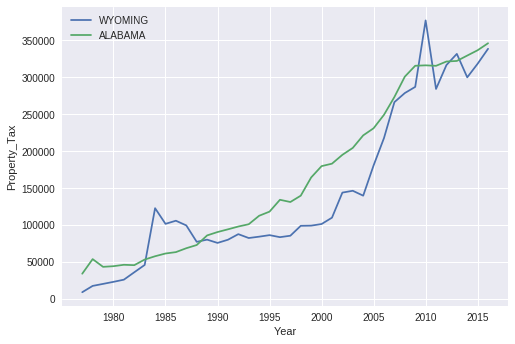

In [0]:
print('With respect to', attribute, ':')
df = clean_data(attribute)
for state in df.index.tolist():
  indices = getNearest(df, num+1)
  id_ = df.index.tolist().index(state)
  neighbors = indices[id_]
  similar_states = df.index[neighbors].tolist()
#   print(state, 'is most similar to', similar_states[1:])
  plotting(similar_states, attribute)